# Environmental Drivers of Local Dengue Outbreaks: A Machine Learning Approach
### Team Members : Yash Parab 20538923, Sarvesh Shantanu 20575058, Abdullah Ansari 20579233 

## Research Questions:
#### 1. Can addressing outliers in the data and applying scaling techniques improve the performance and predictive accuracy of the machine learning models?
#### 2. How do ensemble methods compare to other algorithms in predicting dengue cases accurately?

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score
%matplotlib inline

## Reading Datasets

In [3]:
X = pd.read_csv('dengue_features_train.csv')
df = pd.read_csv('dengue_labels_train.csv')
y = df['total_cases']

## Exploratory Data Analysis 
### Team Members -Sarvesh and Abdullah

### Checking the total sum of null values:

In [4]:
X.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

### Looking at the summary statistics:

In [5]:
X.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


### Looking at the shape of the data:

In [6]:
X.shape

(1456, 24)

## Visualising the data:

### Using distribution plots to check the distribution of the given features:

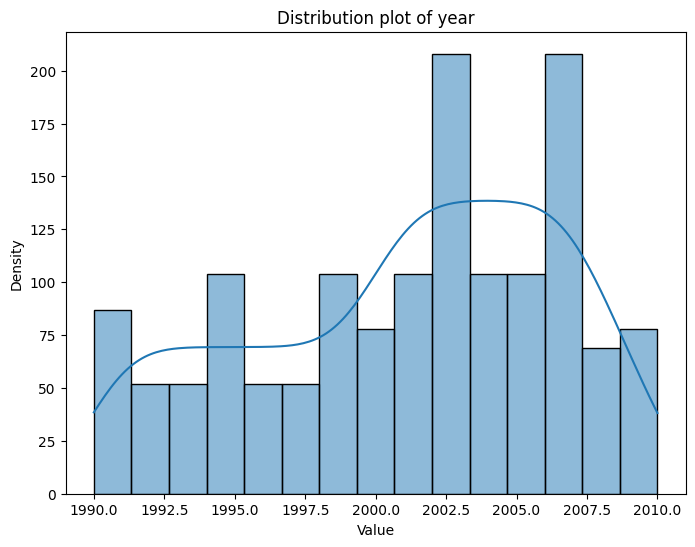

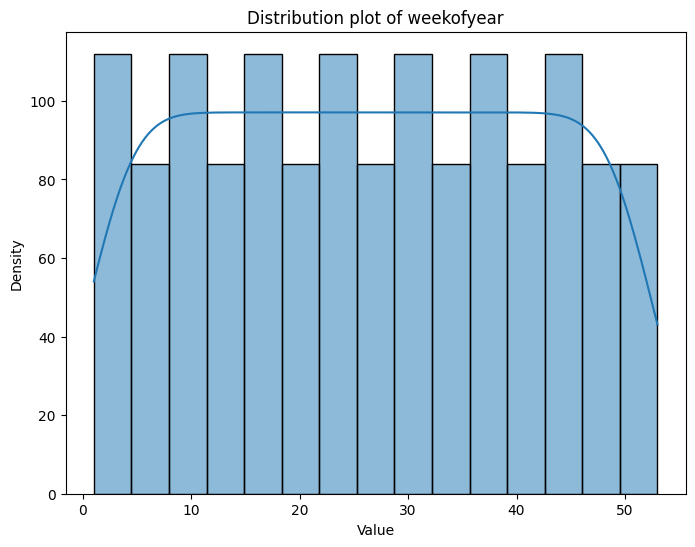

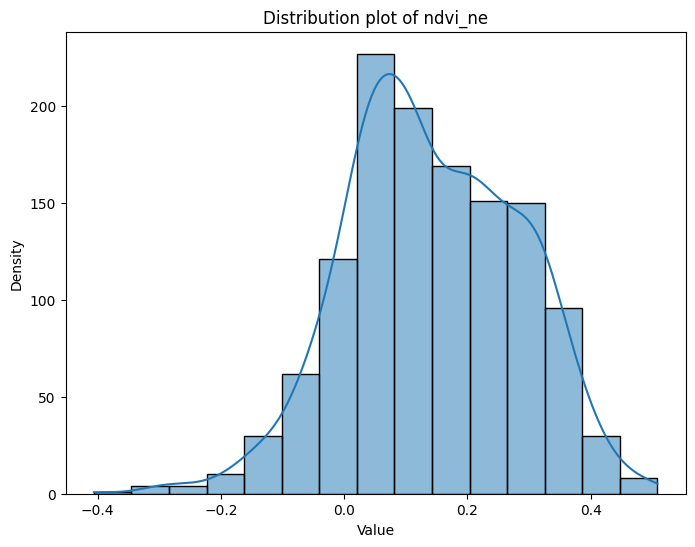

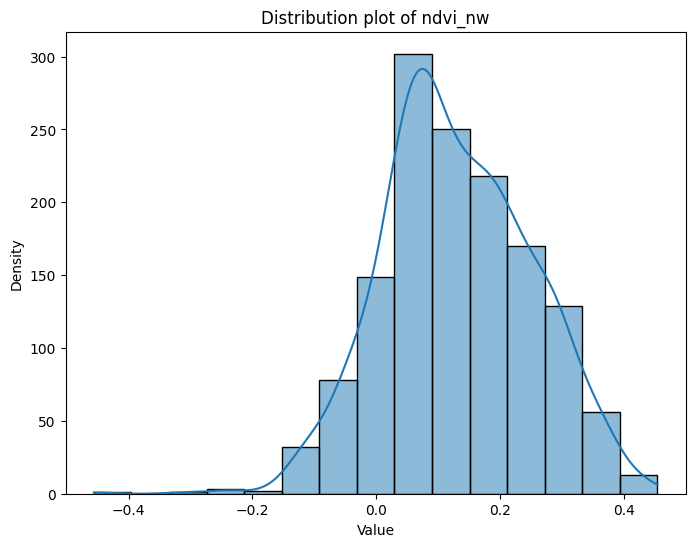

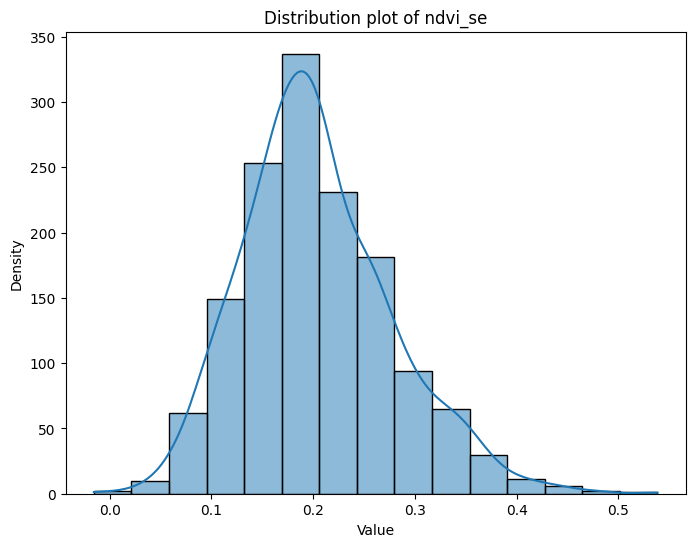

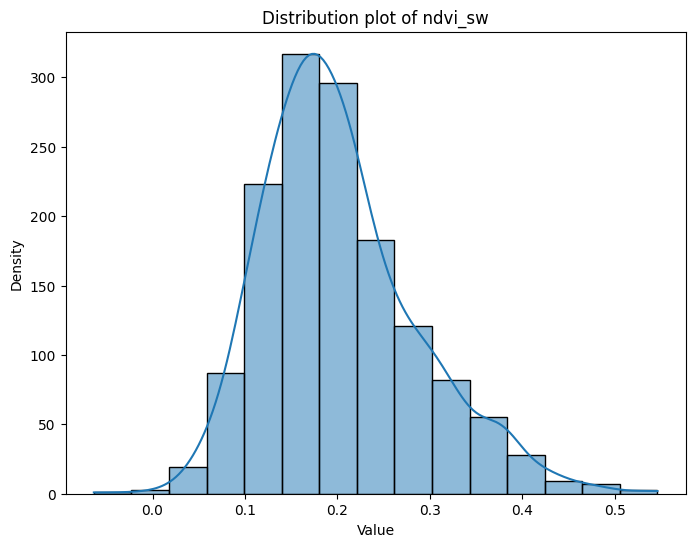

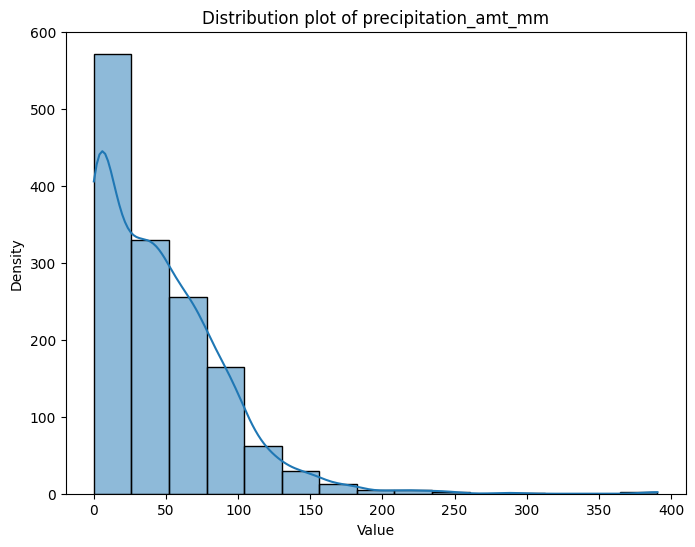

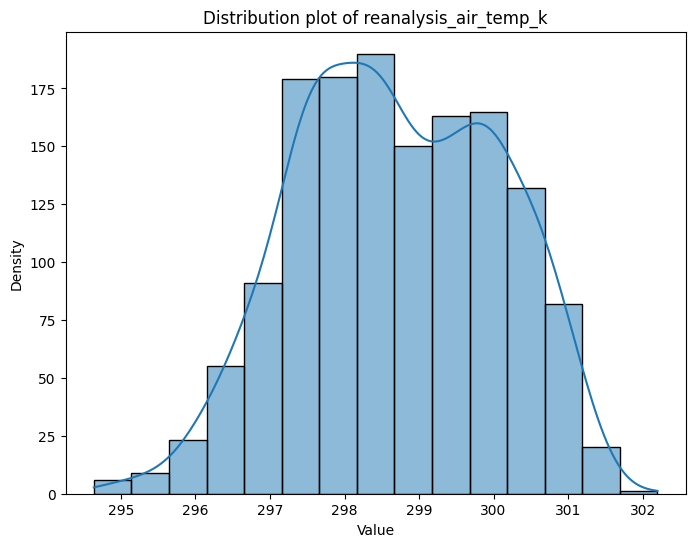

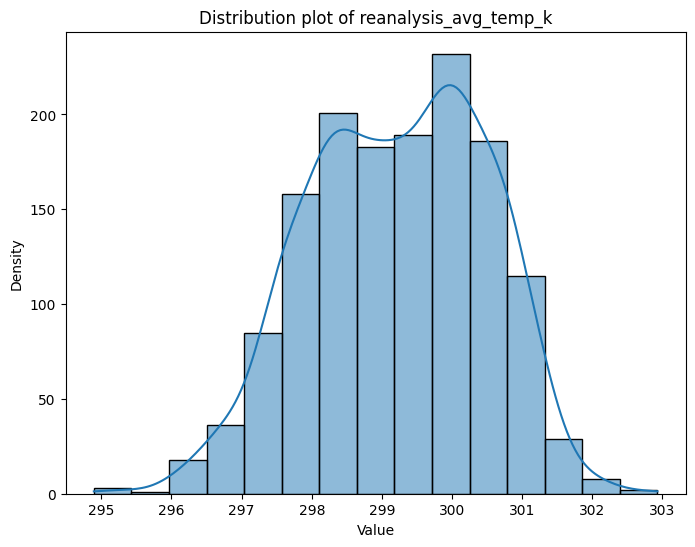

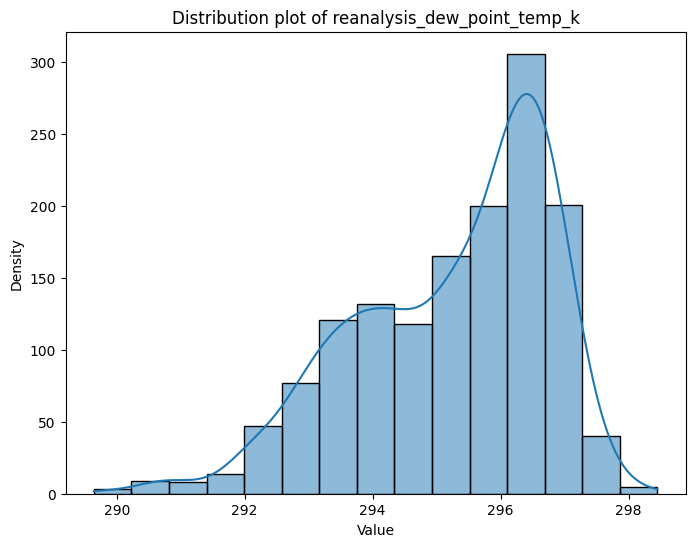

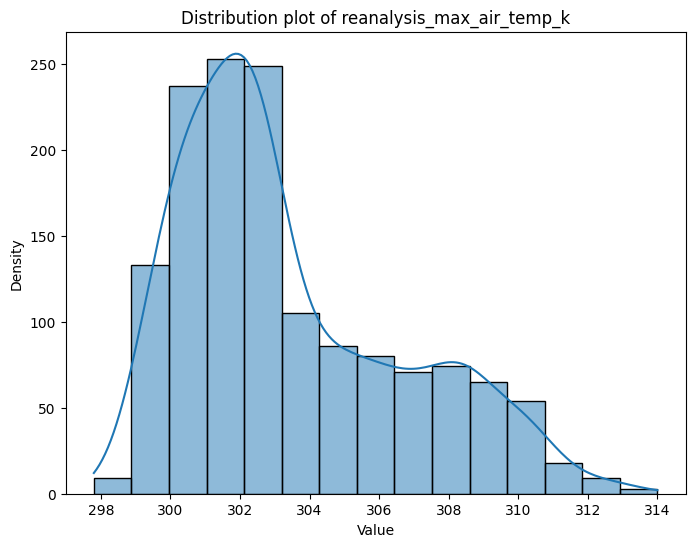

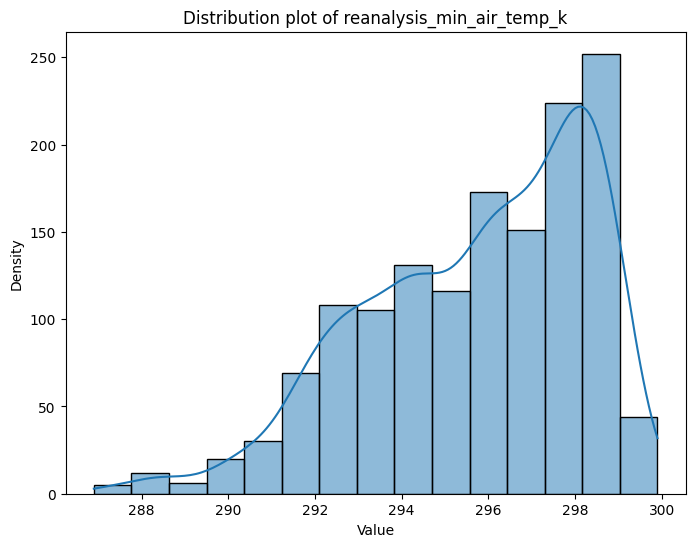

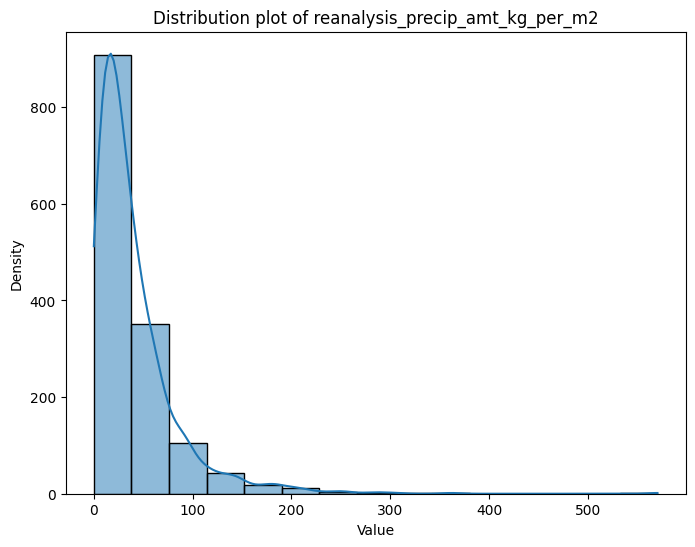

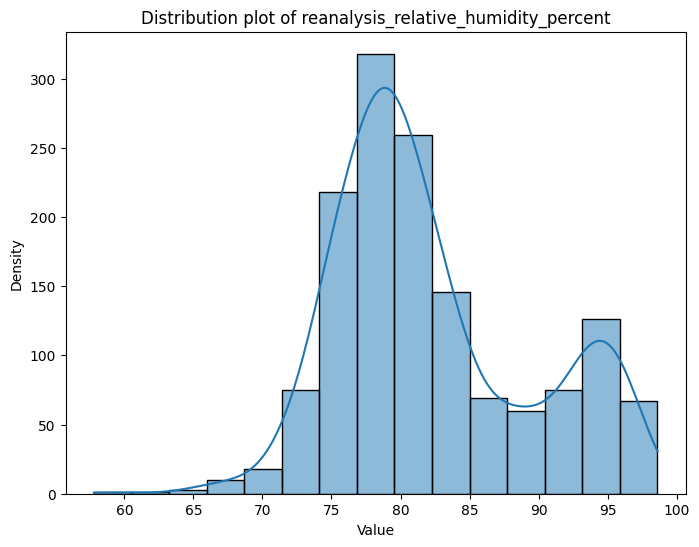

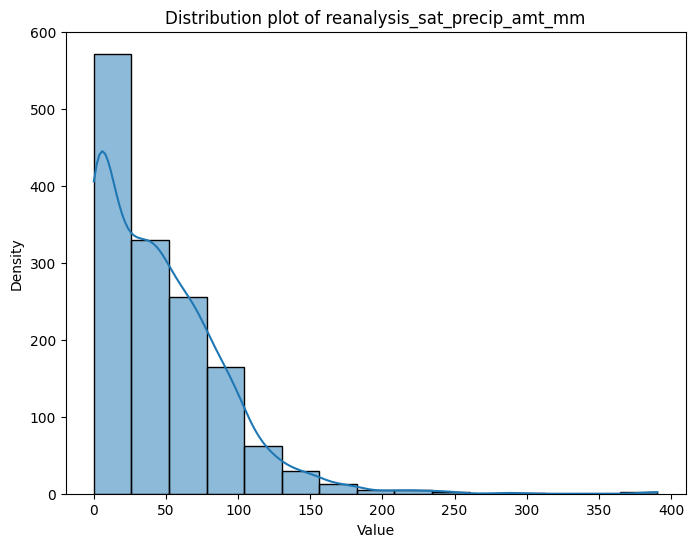

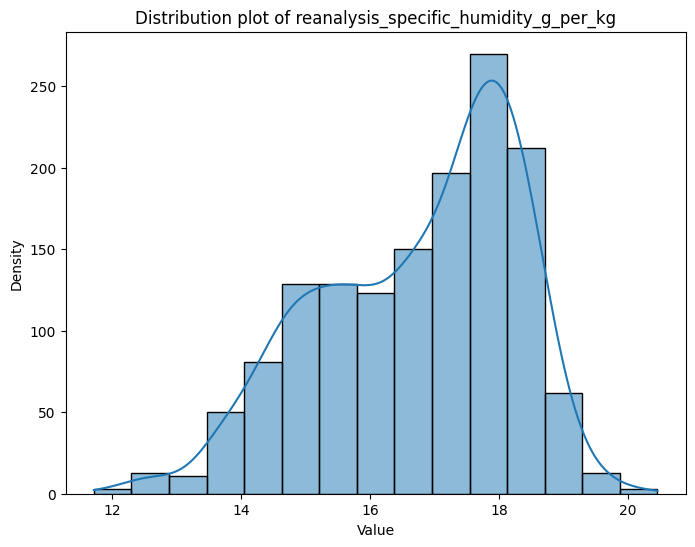

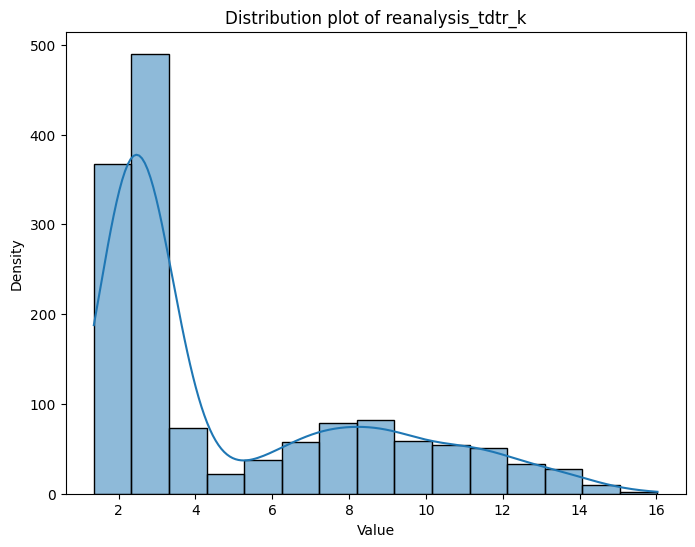

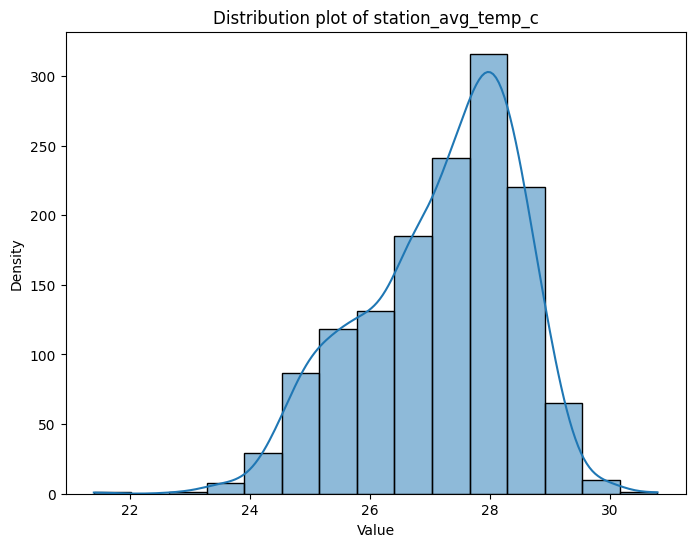

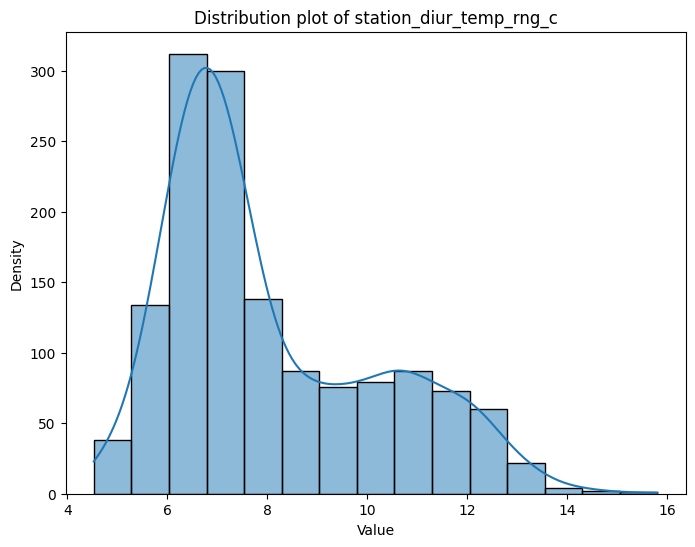

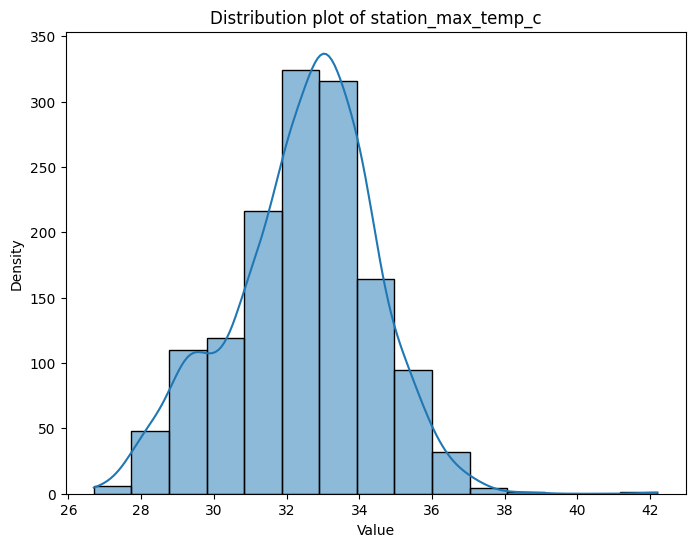

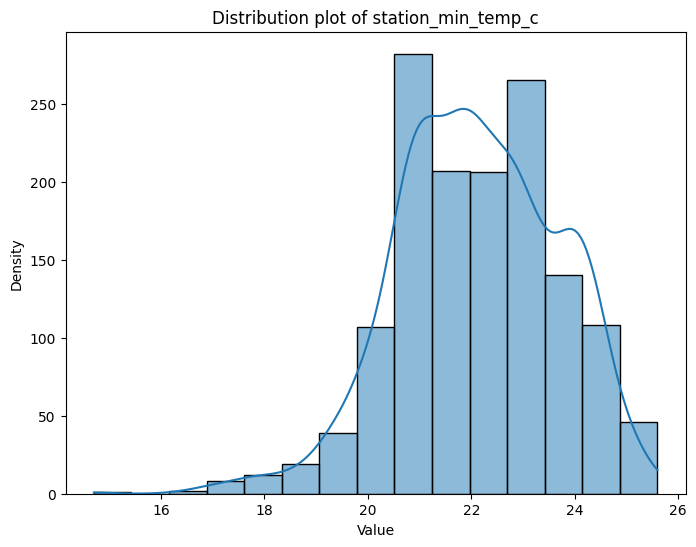

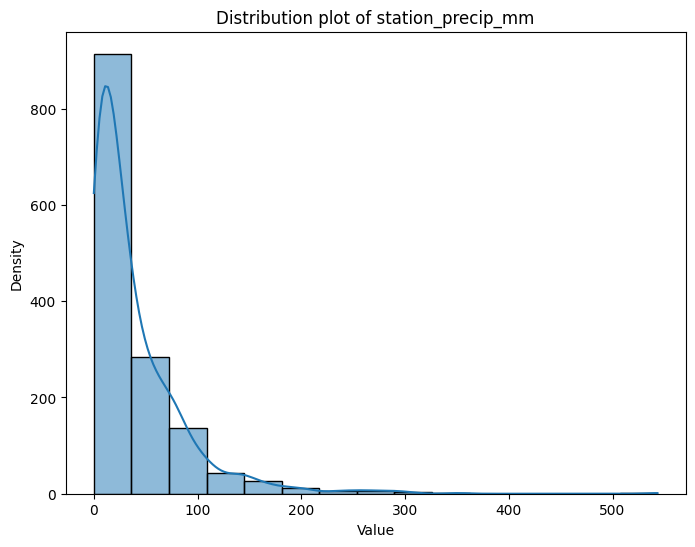

In [7]:
columns_to_plot = ['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(X[column], bins=15, kde=True)
    plt.title(f'Distribution plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

### Using Box Plots for outlier detection

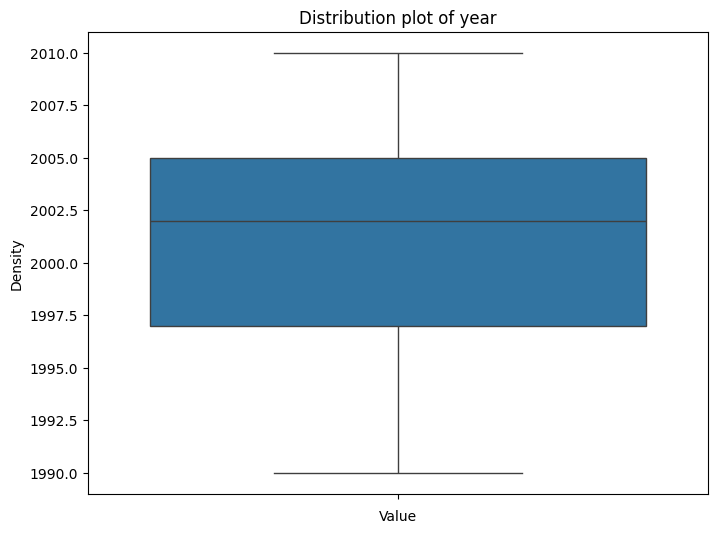

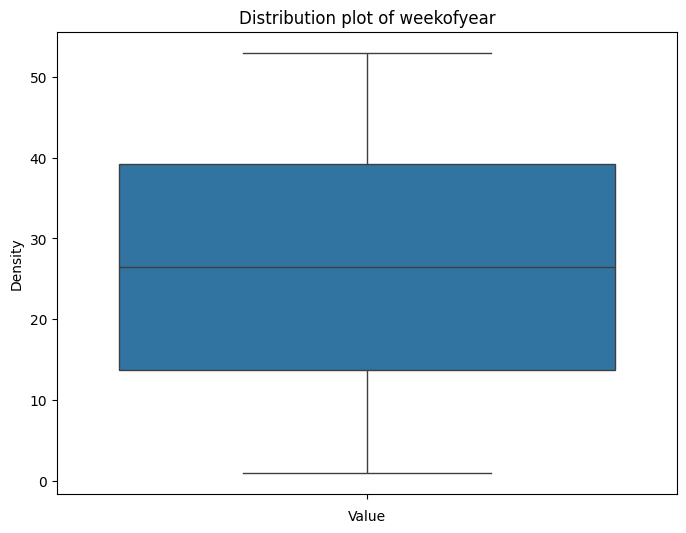

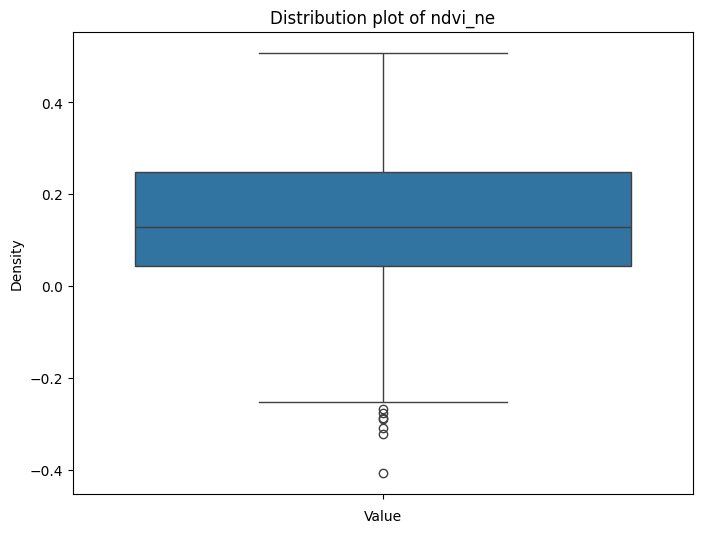

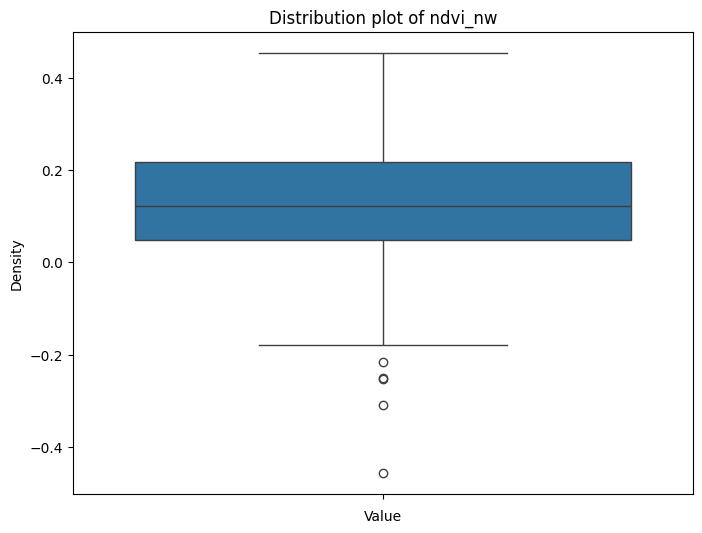

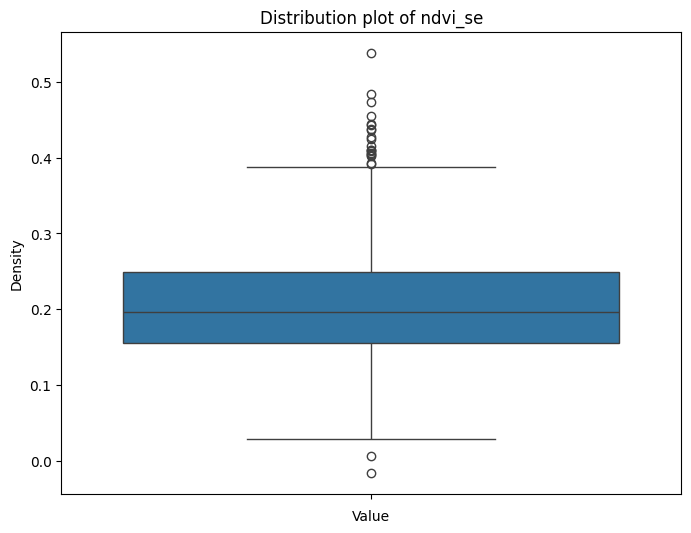

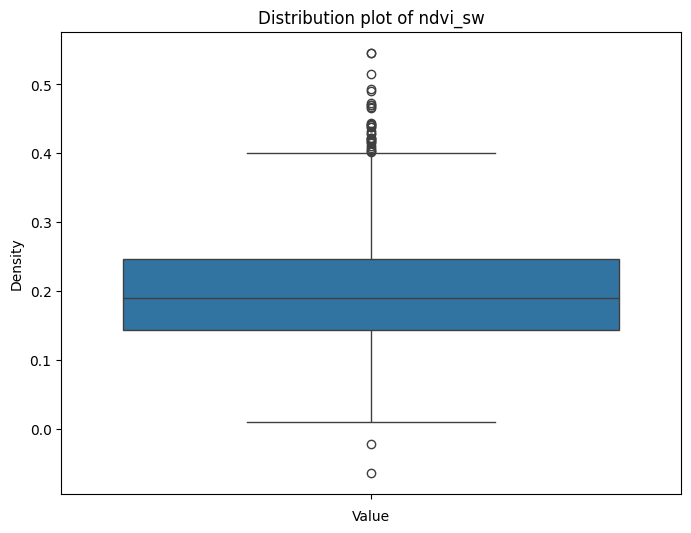

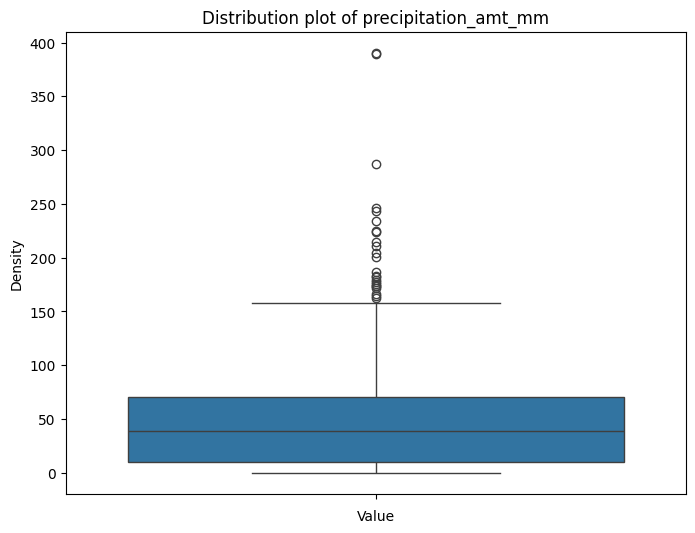

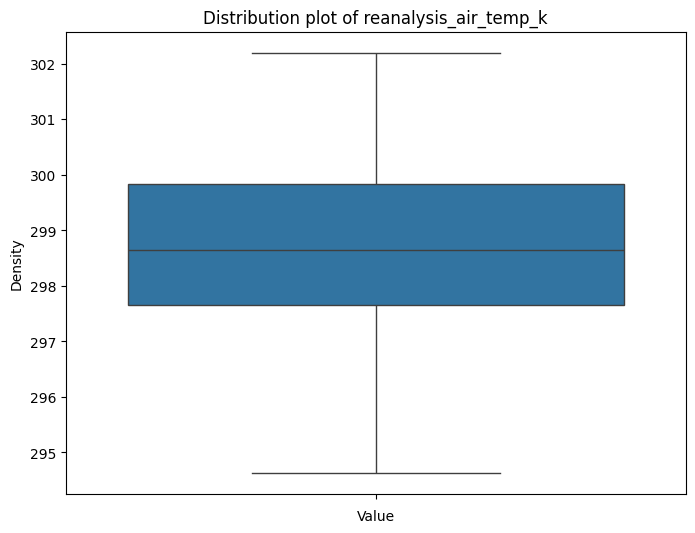

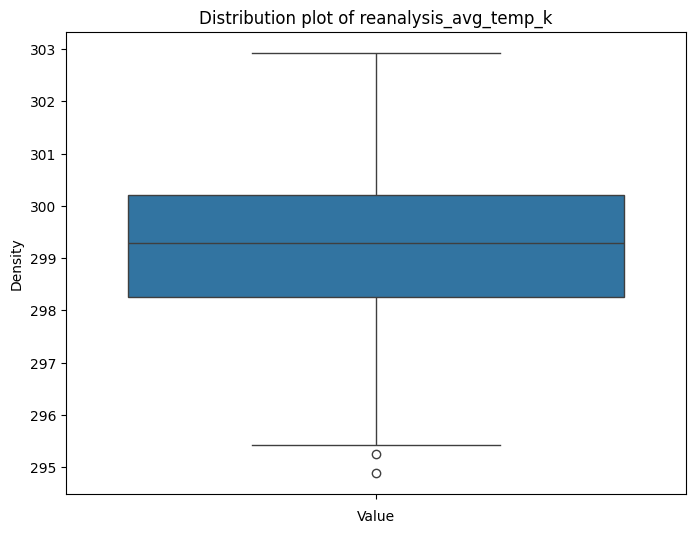

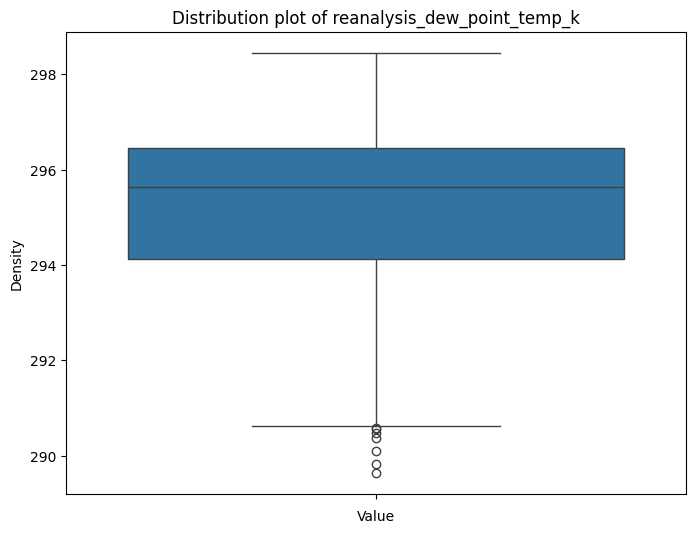

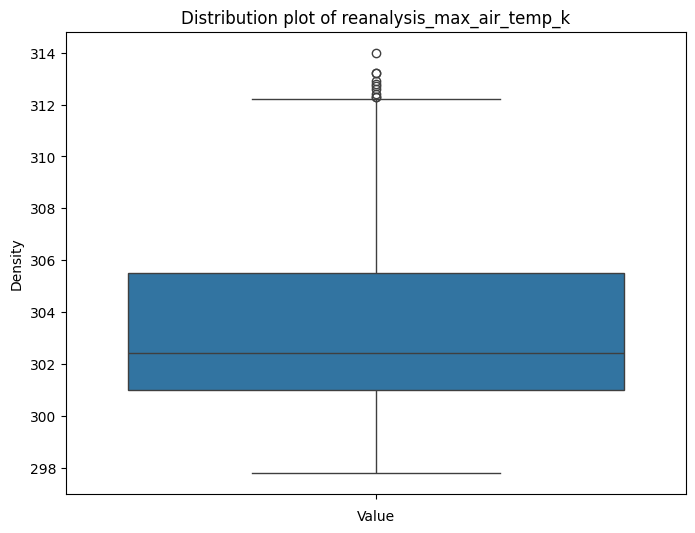

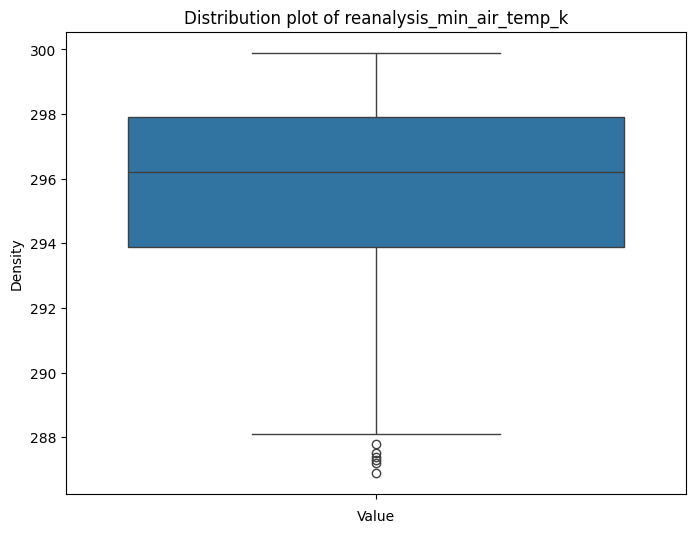

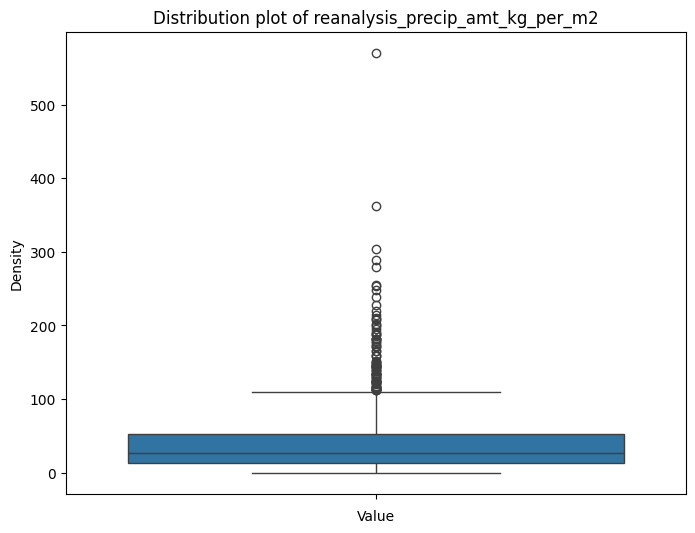

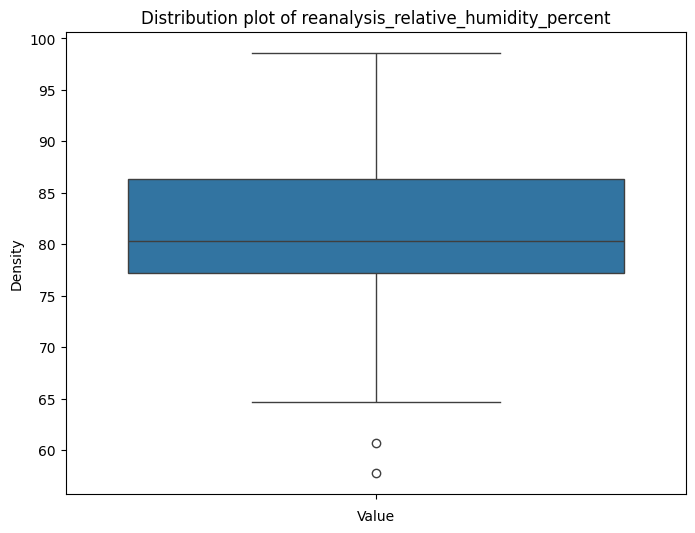

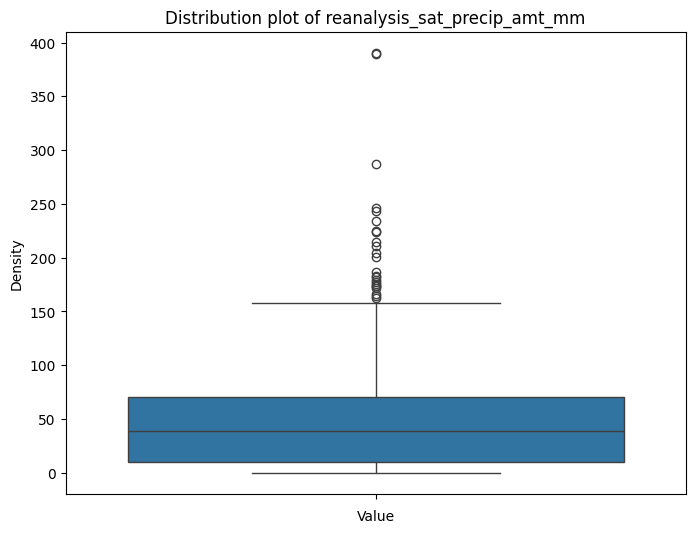

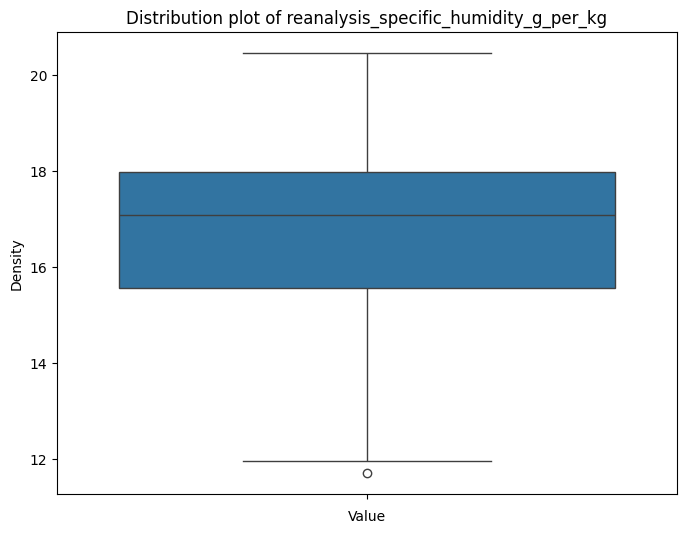

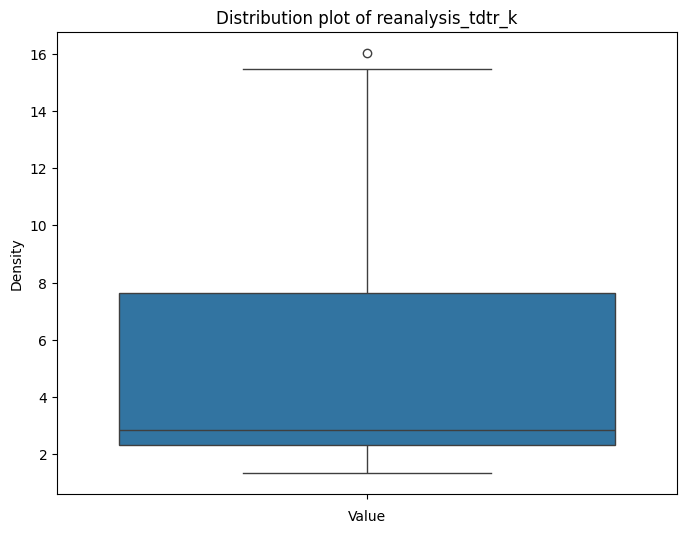

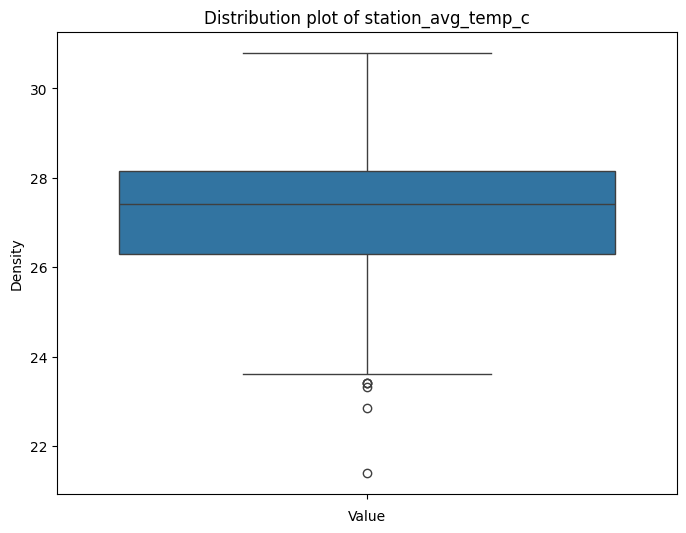

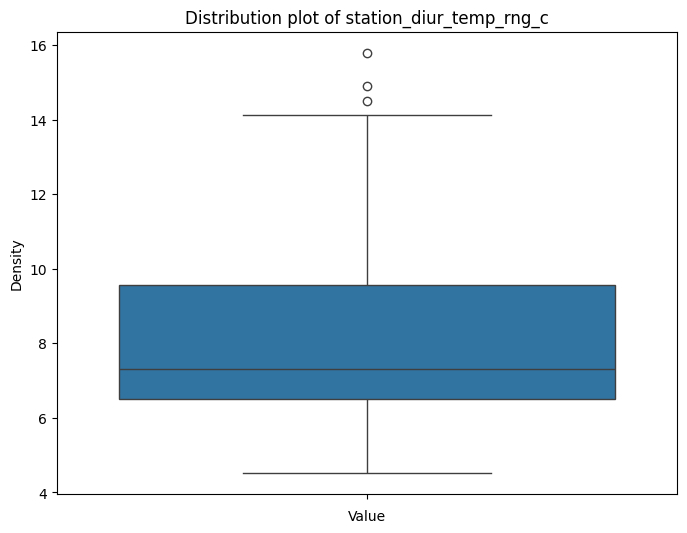

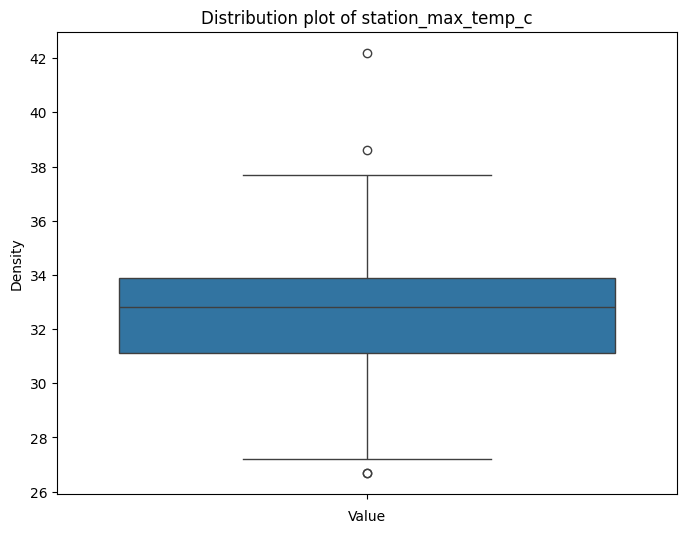

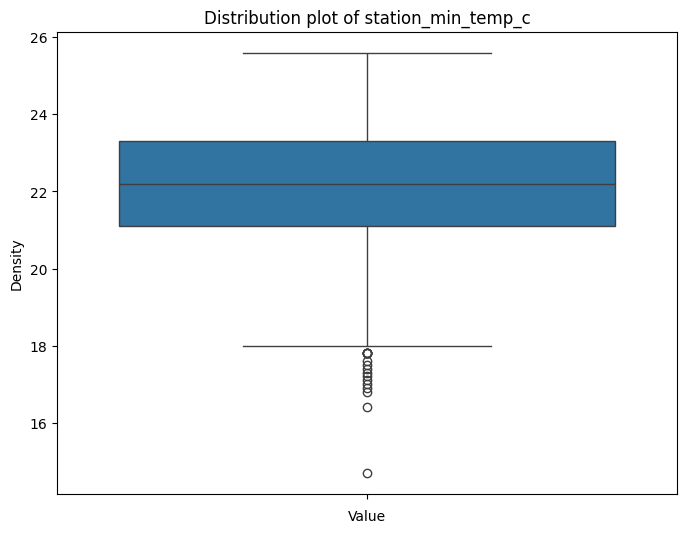

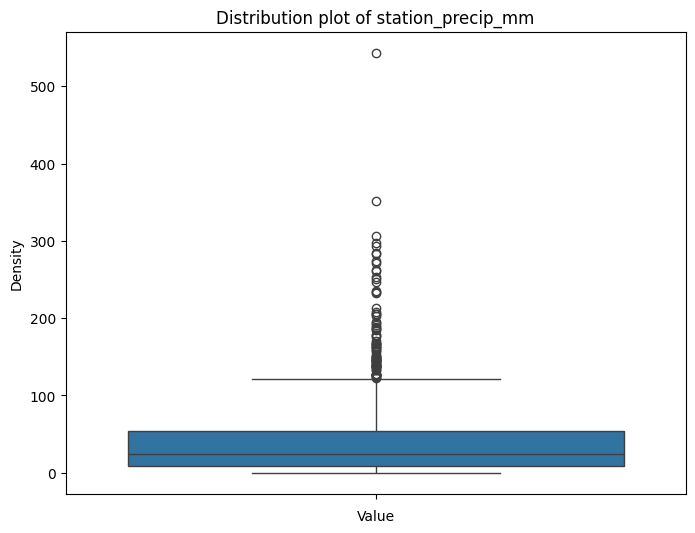

In [8]:
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.boxplot(X[column])
    plt.title(f'Distribution plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

#### From the exploratory data analysis it was revealed that most of the features are not normally distributed and contains several outliers.
#### We also see that the data for San Juan is almost twice as that of Iquitos.

## Data Preprocessing
### Team Members - Abdullah and Yash

### Dropping unnecessary features in the dataset

In [10]:
X.drop('week_start_date',axis = 1,inplace = True)

### Encoding the 'city' column where 'sj' is 0 and 'iq' = 1

In [11]:
X['city'] = X.city.map({'sj':0,'iq':1})

In [12]:
X['city']

0       0
1       0
2       0
3       0
4       0
       ..
1451    1
1452    1
1453    1
1454    1
1455    1
Name: city, Length: 1456, dtype: int64

### Using Simple Imputer to replace the null values with the columns mean

In [13]:
imp = SimpleImputer(strategy = 'mean')
transformed= imp.fit_transform(X)

In [14]:
X_tranformed = pd.DataFrame(transformed,columns = X.columns)
X_tranformed 

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.0,1990.0,18.0,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,0.0,1990.0,19.0,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,0.0,1990.0,20.0,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,0.0,1990.0,21.0,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,0.0,1990.0,22.0,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,2010.0,21.0,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,1.0,2010.0,22.0,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,1.0,2010.0,23.0,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,1.0,2010.0,24.0,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


### Looking at the most important features

In [15]:
model1 = ExtraTreesClassifier()
model1.fit(X_tranformed,y)
print(model1.feature_importances_)

[0.00583581 0.06204084 0.05160256 0.04382686 0.04542468 0.04500955
 0.04377551 0.0403019  0.04383464 0.04273394 0.04357795 0.04417966
 0.04531396 0.04271459 0.04407949 0.041442   0.04535887 0.04541685
 0.04550561 0.04797293 0.04225035 0.04276619 0.04503525]


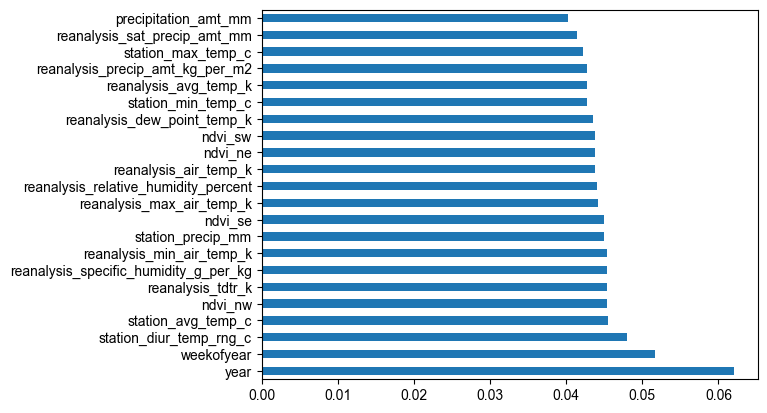

In [16]:
feat_importances = pd.Series(model1.feature_importances_, index=X_tranformed.columns)
feat_importances.nlargest(22).plot(kind='barh')
sns.set(rc={'figure.figsize':(18,10)})
plt.show()

## Data Modelling without handling outliers and scaling 
### Team Members - Sarvesh and Yash  


In [19]:
# Splitting the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X_tranformed, y, test_size = 0.2, random_state = 1)

### KNN(K-Nearest Neighbour)

In [20]:
# Defining how many neighbors will be checked
k=5
# Creating a KNN instance
model=KNeighborsRegressor(n_neighbors=k)

# Training the KNN model on the generated dataset
model.fit(X_train,y_train)

# Predicting using the trained regressor
y_pred = model.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.08532874684527847
Root Mean Square Error (RMSE): 38.48868006506179
Mean Absolute Error (MAE): 19.825342465753426


### Decision Tree

In [21]:
# Creating a Decision Tree Regressor instance
dt = DecisionTreeRegressor()

# Training the Decision Tree model on the generated dataset
dt.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = dt.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.6246541421717833
Root Mean Square Error (RMSE): 24.655642050685007
Mean Absolute Error (MAE): 12.996575342465754


### Random Forest

In [22]:
# Creating a Random Forest Regressor instance
rf = RandomForestRegressor()

# Training the Random Forest model on the generated dataset
rf.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = rf.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.6169409314368429
Root Mean Square Error (RMSE): 24.907685691505932
Mean Absolute Error (MAE): 11.775034246575343


### XGBoost

In [24]:
xgb_reg1 = xgb.XGBRegressor()

# Training the XGBoost model on the generated dataset
xgb_reg1.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = xgb_reg1.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.7530442333370906
Root Mean Square Error (RMSE): 19.99908326252474
Mean Absolute Error (MAE): 10.19226823114369


## Data Modelling with handling outliers and scaling 
### Team Members - Yash, Abdullah, Sarvesh 

### Using the IQR method to handle outliers

In [25]:
columns_to_cap = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm',
                  'reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                  'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
                  'reanalysis_precip_amt_kg_per_m2', 'reanalysis_relative_humidity_percent',
                  'reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg',
                  'reanalysis_tdtr_k', 'station_avg_temp_c', 'station_diur_temp_rng_c',
                  'station_max_temp_c', 'station_min_temp_c', 'station_precip_mm']
X = X_tranformed
for column in columns_to_cap:
    # Calculating percentiles and IQR
    percentile25 = X[column].quantile(0.25)
    percentile75 = X[column].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
    # Capping outliers
    X[column] = np.where(
        X[column] > upper_limit,
        upper_limit,
        np.where(
            X[column] < lower_limit,
            lower_limit,
            X[column]
        )
    )

### Using Robust Sclaer for scaling

In [26]:
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)

In [27]:
# Splitting the dataset into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

### Exploring various models

### KNN(K-Nearest Neighbour)

In [28]:
# Defining how many neighbors will be checked
k=5
# Creating a KNN instance
model=KNeighborsRegressor(n_neighbors=k)

# Training the KNN model on the generated dataset
model.fit(X_train,y_train)

# Predicting using the trained regressor
y_pred = model.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)



R-squared score: 0.07827971243167153
Root Mean Square Error (RMSE): 38.636704459708376
Mean Absolute Error (MAE): 19.69794520547945


### Decision Tree

In [29]:

# Creating a Decision Tree Regressor instance
dt = DecisionTreeRegressor()

# Training the Decision Tree model on the generated dataset
dt.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = dt.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.5254419854487127
Root Mean Square Error (RMSE): 27.723314949349437
Mean Absolute Error (MAE): 13.438356164383562


### Random Forest

In [30]:
# Creating a Random Forest Regressor instance
rf = RandomForestRegressor()

# Training the Random Forest model on the generated dataset
rf.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = rf.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)

R-squared score: 0.626687058237592
Root Mean Square Error (RMSE): 24.588782510373825
Mean Absolute Error (MAE): 11.71027397260274


### XGBoost 

In [31]:
# Creating a XGBoost Regressor instance
xgb_reg = xgb.XGBRegressor()

# Training the XGBoost model on the generated dataset
xgb_reg.fit(X_train, y_train)

# Predicting using the trained regressor
y_pred = xgb_reg.predict(X_test)  # X_test contains features of test data

# Evaluating the regressor performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Calculating Root Mean Square Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred)  # Set squared=False to get RMSE
# Print the RMSE for the model
print("Root Mean Square Error (RMSE):", rmse)

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# Print the MAE for the model
print("Mean Absolute Error (MAE):" , mae)



R-squared score: 0.8102259312773957
Root Mean Square Error (RMSE): 17.531494388893787
Mean Absolute Error (MAE): 9.34571461119268
